## K-최근접 이웃( K-Nearest Neighbor) 알고리즘

#### K-최근접 이웃 알고리즘  
- K-Nearest Neighbor : K-NN
- 데이터를 가장 가까운 속성에 따라 분류하여 레이블링 하는 알고리즘
- K개의 가까운 이웃의 속성에 따라 분류 
    - 주변의 가장 가까운 K개의 데이터를 보고 데이터가 속할 그룹을 판단
- 유클리안 거리 사용 
---
### 사이킷런의 KNN 알고리즘 클래스
- 분류 모델을 위한 KNeighborsClassifier
- 회귀 모델을 위한 KNeighborsRegressor
- 매개변수 동일 
---
- KNeighborsClassifier 주요 매개변수
  - n_neighobrs : 디폴트 5
  - weights 
    - uniform : 각 이웃의 포인트에 동일한 가중치 부여 (디폴트)  
    - distance : 거리의 역수로 가중치 부여. 
      - 가까운 데이터가 멀리 있는 데이터보다 큰 영향을 미침 
---
그림에서    
- 소속 그룹 판단
    - K=1인 경우 : 노란색 그룹
    - K=3인 경우 : 파란색 그룹

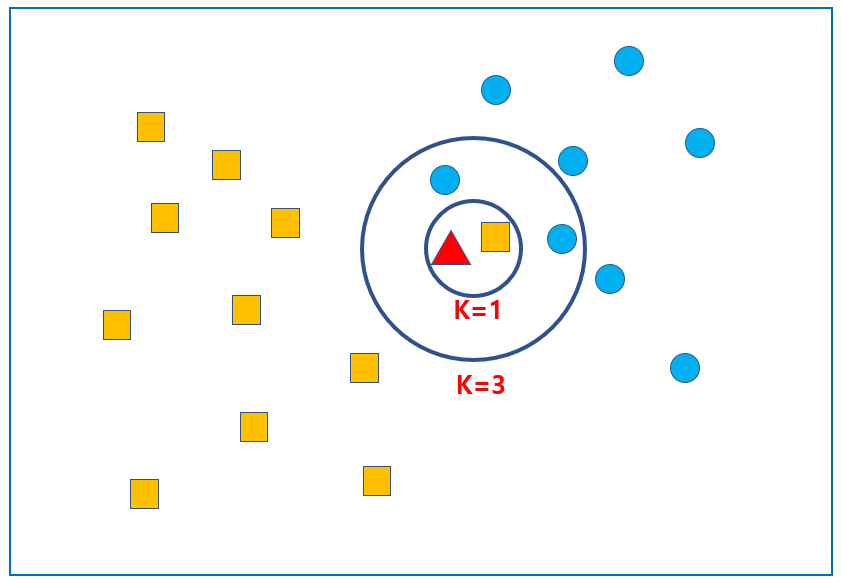

### K-최근접 이웃 알고리즘 예제

### K-최근접 이웃 알고리즘 예측 프로세스
- (1) 데이터 세트 준비 : 도미와 빙어 길이와 무게 데이터   
    - 길이와 무게 각 49 데이터 : 도미(35) / 빙어(14)    
    - 피처 데이터 / 레이블 데이터 생성     
- (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트    
- (3) 모델 학습 / 평가 / 예측     
    - 결과 : 잘못 예측    
- (4) 길이/무게 두 변수 스케일링    
- (5) 스케일된 값으로 모델 학습 / 평가 / 예측   

### (1) 데이터 세트 준비 : 도미와 빙어 길이와 무게 데이터  
- 길이와 무게 각 49 데이터 : 도미(35) / 빙어(14)  
- 피처 데이터 / 레이블 데이터 생성 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
# 도미와 빙어 데이터 준비 (길이와 무게)
# 큰 수치 35개 : 도미 (1)
# 작은 수치 14개 : 빙어 (0)

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,  31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,  10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,  500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,  700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,  7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

###  데이터 합치기
- np.concatenate() : 1차원 배열로 합치기 (옆으로)
- np.column_stack() : 2차원 배열로 합치기


In [6]:
fish_data = np.column_stack([fish_length, fish_weight])
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [7]:
fish_target = np.concatenate([np.ones(35), np.zeros(14)])
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=11)

In [9]:
X_train.shape[0]/49
X_test.shape[0]/49

0.7346938775510204

0.2653061224489796

In [10]:
pd.DataFrame(fish_target).value_counts(normalize=True)
pd.DataFrame(y_train).value_counts(normalize=True)
pd.DataFrame(y_test).value_counts(normalize=True)

1.0    0.714286
0.0    0.285714
Name: proportion, dtype: float64

1.0    0.722222
0.0    0.277778
Name: proportion, dtype: float64

1.0    0.692308
0.0    0.307692
Name: proportion, dtype: float64

### (3) 모델 학습 / 평가 / 예측 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier() # n_neighbors=5 기본값
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
kn_clf.predict([[25, 150]])
kn_clf.predict_proba([[25, 150]])
# length=25, weight=150는 빙어(0)으로 예측했다

array([0.])

array([[0.8, 0.2]])

In [13]:
# 실제 정확도
from sklearn.metrics import accuracy_score
accuracy_score(y_test, kn_clf.predict(X_test))

1.0

#### 빙어로 예측한 이유 확인 : 산점도 확인
- 누구를 이웃으로 판단하는지 확인 필요 

Text(0.5, 0, 'Length')

Text(0, 0.5, 'Weight')

Text(25, 150, '(25, 150)')

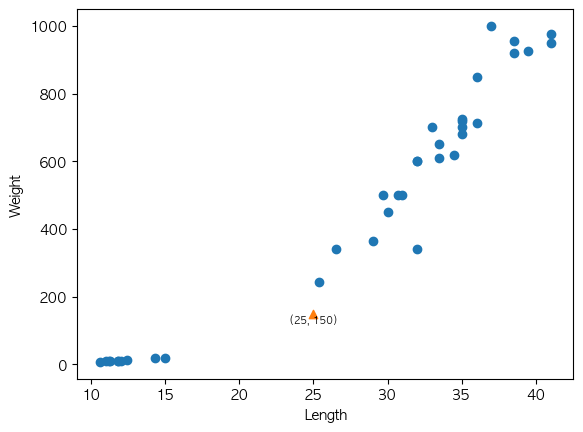

In [14]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.scatter(25, 150, marker='^')
plt.text(25, 150, '(25, 150)', fontsize=7, ha='center', va='top')
plt.show()
# 근데 그래프를 보면 아무리 봐도 빙어가 아닌데?

In [15]:
# 이웃이라고 생각하는 샘플 5개를 추출하여 거리(Euclidean Metric)와 해당 샘플의 인덱스를 반환한다
dist, idx = kn_clf.kneighbors([[25, 150]])
print(dist, idx)

[[ 92.00086956 130.48375378 130.73859415 137.17988191 140.62090883]] [[11 34 35 31 25]]


In [16]:
# 그래프로 보면 모르지만 수치상으로는 빙어 그룹에 더 가까운 값을 보여준다
X_train[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 11.8,  10. ]]])

#### 결과가 잘못 나온 이유  
- 길이와 무게가 1대1로 모델에 반영되려면 크기가 비슷해야 하는데,   
- 길이에 비해 무게가 크기가 너무 커서 길이와 무게가 다른 비율로 반영됨  
- 거리 92와 130 비율이 이상함  
- x축은 범위가 좁고, y축은 범위가 넓기 때문에, 실제 거리가 크게 증가함  
- 즉, 두 변수의 값이 스케일이 다르다고 할 수 있음  
- 스케일링 필요 : 표준 스케일링 적용 

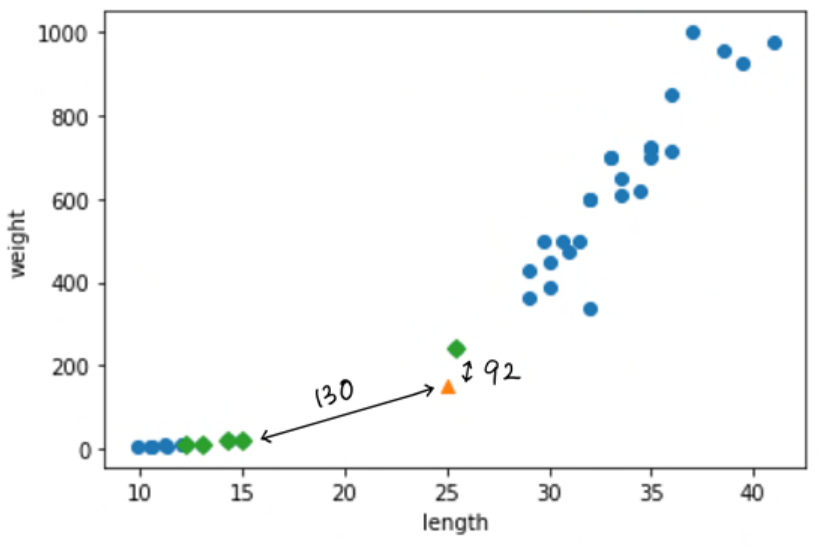

### (4) 길이/무게 두 변수 스케일링

#### z-점수 표준화(z-score standardization)   
    - 데이터의 평균을 0, 분산을 1이 되도록 스케일링하는 것  
    - 표준 스케일링과 동일 : StandardScaler와 결과 동일  
    - 각 값이 평균에서 얼마나 떨어져 있는지를 나타내는 척도    
    - 이상치 문제를 피하는 데이터 정규화 벙법으로 사용     
    - (원점수 - 평균) / 표준편차    

In [17]:
mean = np.mean(X_train, axis=0)
stddv = np.std(X_train, axis=0)
print(mean, stddv)

[ 27.825      479.08055556] [ 10.32446864 341.47747186]


In [18]:
def enscale(X, mean, stddv):
    return (X - mean)/stddv

def descale(X, mean, stddv):
    return (X * stddv) + mean

X_train_scaled = enscale(X_train, mean, stddv)
X_train_scaled[:6]

array([[ 0.69495102,  0.64695174],
       [ 0.88866559,  1.525487  ],
       [ 0.64652238,  0.41267567],
       [-1.53276653, -1.37426505],
       [ 0.11380731, -0.3399362 ],
       [-1.55213799, -1.37397221]])

### (5) 스케일된 값으로 모델 학습 / 평가 / 예측

Text(0.5, 0, 'Length_scaled')

Text(0, 0.5, 'Weight_scaled')

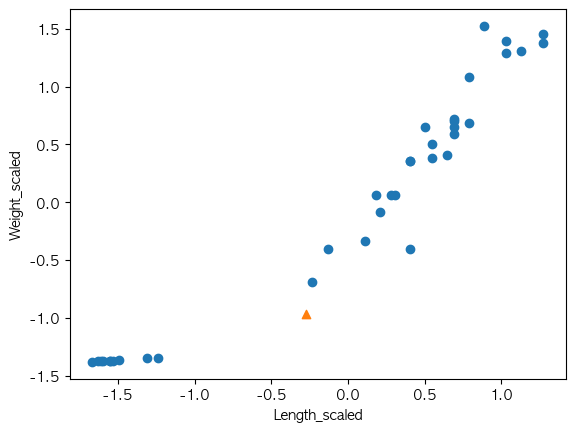

In [19]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
plt.xlabel('Length_scaled')
plt.ylabel('Weight_scaled')
xx, yy = enscale([25, 150], mean, stddv)
plt.scatter(xx, yy, marker="^")
plt.show()

In [20]:
kn_clf = KNeighborsClassifier() # n_neighbors=5 기본값
kn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [21]:
kn_clf.predict(enscale([[25, 150]], mean, stddv))
# 이제 정상적으로 나온다 / 도미(1)로 출력

array([1.])

In [22]:
# 이건 원래 만점이었지
accuracy_score(y_test, kn_clf.predict(enscale(X_test, mean, stddv)))

1.0